# BFS 搜索代码复现

下面内容是 BFS 代码复现，经典的使用场景是简单的搜索问题以及行程路线设计，例如，已知北京（BEIJING），长春（CHANGCHUN），乌鲁木齐（URUMCHI），武汉（WUHAN），广州（GUNAGHZOU），深圳（SHENZHEN），曼谷（BANGKOK），上海（SHANGHAI），纽约（NEWYORK）之间有如下的航班信息：
长春--北京，乌鲁木齐--北京，北京--武汉，北京--深圳，北京--纽约，纽约--上海，上海--武汉，武汉--广州，广州--曼谷，深圳--曼谷。

目标：
1. 设计可行的航班路线
2. 设计换乘最少的的航班路线

首先定义变量，注意此时不要直接利用字符串做字典，这是因为如果产生拼写上的问题会使得很难找到问题所在

In [2]:
BEIJING, CHANGCHUN, URUMCHI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN URUMCHI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

利用航班信息制作字典，键值是城市变量，值是可到达城市的列表。注意：在我们这个最简单的例子中模型是连通的无向图，也就是说任意两个城市都能互相抵达（直接或者间接）并且城市 A 有到 B 的航班则一定存在 B 到 A 的航班。

In [12]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMCHI: [BEIJING], 
    BEIJING: [URUMCHI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [BEIJING, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

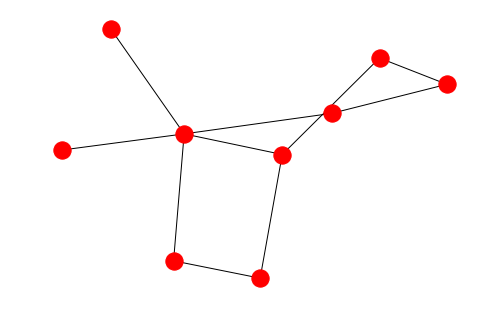

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
graph = connection
g = nx.Graph(graph)
nx.draw(g)

In [16]:
def navigator(start, destination, connection_graph):
    # pathes 是一个队列，每弹出一个元素（这个队列的元素是一个列表，记录了已走的路线），就把所有的最后能到达的目的地所能走到的地方再放到这个路线中
    pathes = [[start]]
    # set 是一个集合，用以确定我们不要走回头路
    seen = set()
    
    while len(pathes) != 0:
        
        path = pathes.pop(0)
        # frontier 是我们最后所到达的地点，由此确定下一步要走哪些地点
        frontier = path[-1]
        
        if frontier not in seen: 
            # 现在 frontier 就加入 seen 的集合
            seen.add(frontier)
            # 所有从 frontier 出发可以到达的地方组成的列表
            successors = connection_graph[frontier]
            
            for s in successors: 
                if s == destination: 
                    path.append(s)
                    return path
                else:
                    pathes.append(path + [s])  
                    pathes = sorted(pathes, key=len) 

In [17]:
navigator(WUHAN, SHENZHEN, connection)

['WUHAN', 'BEIJING', 'SHENZHEN']

例子：

In [27]:
BEIJING, CHANGCHUN, URUMCHI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN URUMCHI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

connection = {
    CHANGCHUN: [BEIJING],
    URUMCHI: [BEIJING], 
    BEIJING: [URUMCHI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [BEIJING, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}
connection_graph = connection
start = CHANGCHUN
destination = GUANGZHOU


pathes = [[start]]
# set 是一个集合，用以确定我们不要走回头路
seen = set()

while len(pathes) != 0:

    path = pathes.pop(0)
    # frontier 是我们最后所到达的地点，由此确定下一步要走哪些地点
    frontier = path[-1]
    
    pathes = sorted(pathes, key=len)
    if frontier not in seen: 
        # 现在 frontier 就加入 seen 的集合
        seen.add(frontier)
        # 所有从 frontier 出发可以到达的地方组成的列表
        
        successors = connection_graph[frontier]
        for s in successors: 
            if s == destination: 
                path.append(s)
                print(path)
            else:
                pathes.append(path + [s])  
    

['CHANGCHUN', 'BEIJING', 'WUHAN', 'GUANGZHOU']
['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK', 'GUANGZHOU']


# 句子生成代码复现

我们的策略当然可以是针对每一个情况具体编程,但是如此的话,可移植性就变得很差。我么选择的方案是在这个给定的规则下，在 “=>”左边,我们认为是规则,在右边 "|" 代表的是随机选择，最终还原的是基本的词素。

In [1]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [3]:
# 将上述规则,转化为词典。
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        # 左侧可扩展,| 则随机选择
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return(grammar)

## 例子

In [4]:
g = parse_grammar(grammar)

In [5]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

下面我们就可以实现句子的生成了。

In [13]:
import random
# 句子生成
def gene(grammar_parsed, target='sentence'):
    # 递归基:还原到了最基本的语素,也就是如果只是在右边,不在左边出现,则就是它本身.
    if target not in grammar_parsed: return target
    
    # 如果不是基本语素,那么随便选择一个组成部分.
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

## 例子

In [20]:
gene(parse_grammar(grammar), target='sentence')

'一个篮球看着一个好看的小小的小小的篮球'

## 变种

数字的加减运算

In [21]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [22]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

6*891*4/1
9-6*4*9
9*8*5-4
35*0+4+8
3/4*1-16
3/8-7-6
08*1-2/0
6+7+0*8
6/5+0/1
1-1*4+8
9+1-5/3
2-1/4*6
6+31/6/8
6/7*9-7
2*6+81+9
5*94-6+3
5+2*7+8
3*3-2-7
6/8+8*6
38*8+6/8
